<a href="https://colab.research.google.com/github/psgrigoletti/cursos-colab/blob/main/Curso_de_Deep_Learning_parte_2_como_a_rede_aprende.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curso de Deep Learning parte 2: como a rede aprende

Curso: https://cursos.alura.com.br/course/deep-learning-como-a-rede-aprende/

Projeto no git: https://github.com/cassiasamp/keras-tensorflow-2/

In [38]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

In [39]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

In [40]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

In [41]:
imagens_treino = imagens_treino/float(255)
imagens_teste = imagens_teste/float(255) 

In [42]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5223 - accuracy: 0.8148 - val_loss: 0.4059 - val_accuracy: 0.8546
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3950 - accuracy: 0.8554 - val_loss: 0.3659 - val_accuracy: 0.8675
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3613 - accuracy: 0.8673 - val_loss: 0.3438 - val_accuracy: 0.8743
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3391 - accuracy: 0.8752 - val_loss: 0.3326 - val_accuracy: 0.8768
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3213 - accuracy: 0.8815 - val_loss: 0.3336 - val_accuracy: 0.8817


# Sumário do modelo

In [43]:
sumario_do_modelo = modelo.summary() # resumo do modelo

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


# Configurando pesos e vieses (zerados ou aleatórios) da camada Dense

In [44]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense_zerados = np.zeros(pesos_camada_dense.shape)
pesos_camada_dense_aleatorios = np.random.rand(pesos_camada_dense.shape[0], pesos_camada_dense.shape[1])

vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense_zerado = np.zeros(vieses_camada_dense.shape)
vieses_camada_dense_aleatorios = np.random.rand(vieses_camada_dense.shape[0])

modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense_zerado])
modelo.layers[1].get_weights()

[array([[0.63020706, 0.6897414 , 0.5331541 , ..., 0.01851262, 0.74782133,
         0.6461605 ],
        [0.7318269 , 0.84931356, 0.3257232 , ..., 0.35112694, 0.89321613,
         0.3210265 ],
        [0.5188332 , 0.1596568 , 0.6912109 , ..., 0.88145185, 0.8881568 ,
         0.6404627 ],
        ...,
        [0.7422589 , 0.54465127, 0.6086811 , ..., 0.38298482, 0.86127   ,
         0.88908315],
        [0.10848948, 0.6662455 , 0.36187193, ..., 0.44551215, 0.4545643 ,
         0.64293015],
        [0.81041145, 0.5901609 , 0.14020512, ..., 0.03062378, 0.13401718,
         0.5625065 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.

# Rodando o modelo

In [62]:
modelo_callbacks = [tensorflow.keras.callbacks.EarlyStopping(monitor="val_loss"),
                    tensorflow.keras.callbacks.ModelCheckpoint(filepath="melhor_modelo.hdf5", monitor="val_loss", save_best_only=True)]

adam = keras.optimizers.Adam(lr=0.002) # lr = learning rate = taxa de aprendizagem

modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])


# modelo.compile(optimizer='adam', 
#                loss='sparse_categorical_crossentropy',
#                metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, batch_size=480, epochs=5, validation_split=0.2, callbacks=modelo_callbacks)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


100/100 [==============================] - 2s 17ms/step - loss: 0.3219 - accuracy: 0.8775 - val_loss: 0.3711 - val_accuracy: 0.8756
Epoch 2/5
100/100 [==============================] - 2s 15ms/step - loss: 0.3230 - accuracy: 0.8793 - val_loss: 0.3737 - val_accuracy: 0.8735


# Nova seção

In [46]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

In [47]:
modelo.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'name': 'flatten_1_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Flatten',
   'config': {'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten_1',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_2',
    'trainable': True,
    'units': 256,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_1',
    'noise_shape': None,
    'rate': 0.2,
    'see

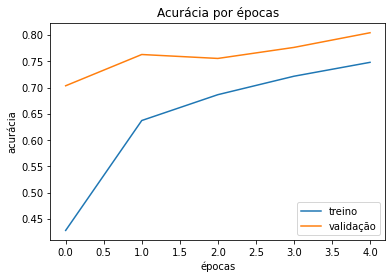

In [48]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

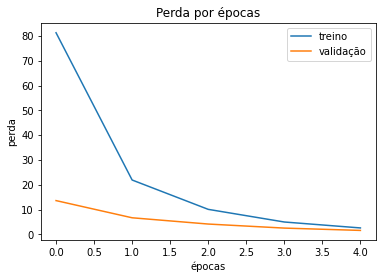

In [49]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [50]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

resultado teste: 2
número da imagem de teste: 2
resultado teste modelo salvo: 2
número da imagem de teste: 2


In [51]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 3ms/step - loss: 1.6231 - accuracy: 0.7933
Perda do teste: 1.6230705976486206
Acurácia do teste: 0.7932999730110168
